In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
# reading the dataframe from the document 

heart_data <- read_delim("data/processed.cleveland.data", delim=",", col_names = FALSE)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
# assigning coloumn names to each column

heart_data <- rename(heart_data,
                    age = X1,
                    sex = X2,
                    cp = X3,
                    trestbps = X4,
                    chol = X5,
                    fbs = X6,
                    restecg = X7,
                    thalach = X8,
                    exang = X9,
                    oldpeak = X10,
                    slope = X11,
                    ca = X12,
                    thal = X13,
                    num = X14)


In [10]:
# removing "?" from data and replacing it with NA

heart_data[heart_data == "?"] <- NA


In [11]:
# selecting columns of interest: age, sex, chol and num

heart_data <- select(heart_data, age, sex, chol, num)


In [12]:
heart_data_clean <- heart_data |>
    mutate(sex = as_factor(sex)) |>
    mutate(sex = fct_recode(sex, "M" = "1", "F" = "0")) |>
    mutate(num = as_factor(num)) |>
    mutate(num = fct_recode(num, "H" = "0", "D" = "1", "D" = "2", "D" = "3", "D" = "4"))

In [13]:
# splitting dataframe into training and testing datasets

heart_split <- initial_split(heart_data_clean, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

In [14]:
# number of male patients in training dataset
male_count <- heart_training |> filter(sex == "M") |> group_by(num) |> summarize(male = n()) 

#number of female patients in training dataset
female_count <- heart_training |> filter(sex == "F") |> group_by(num) |> summarize(female = n()) 

# joining the male and female tables
sex_join <- full_join(male_count, female_count)

# getting the patient, count, percentage, min, max, count of male and female patients and mean of each predictor
num_obs <- nrow(heart_training)
heart_summary <- heart_training |> 
    group_by(num) |>
    summarize(
        count = n(),
        percentage = n()/num_obs * 100,
        min_age = min(age),
        max_age = max(age),
        mean_age = mean(age),
        min_chol = min(chol),
        max_chol = max(chol),
        mean_chol = mean(chol)) 

heart_summary <- full_join(heart_summary, sex_join)
heart_summary

Joining with `by = join_by(num)`
Joining with `by = join_by(num)`


num,count,percentage,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,male,female
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
H,123,54.18502,29,74,52.07317,126,564,243.2764,72,51
D,104,45.81498,41,70,56.96154,131,409,250.2308,84,20


In [16]:
a_plot<-heart_data|>
group_by(sex)|>
summarize(count=n())
a_plot


sex,count
<dbl>,<int>
0,97
1,206


In [25]:
b_plot<-heart_data|>
group_by(num,sex)|>
summarize(count=n())
b_plot

`summarise()` has grouped output by 'num'. You can override using the `.groups`
argument.


num,sex,count
<dbl>,<dbl>,<int>
0,0,72
0,1,92
1,0,9
1,1,46
2,0,7
2,1,29
3,0,7
3,1,28
4,0,2


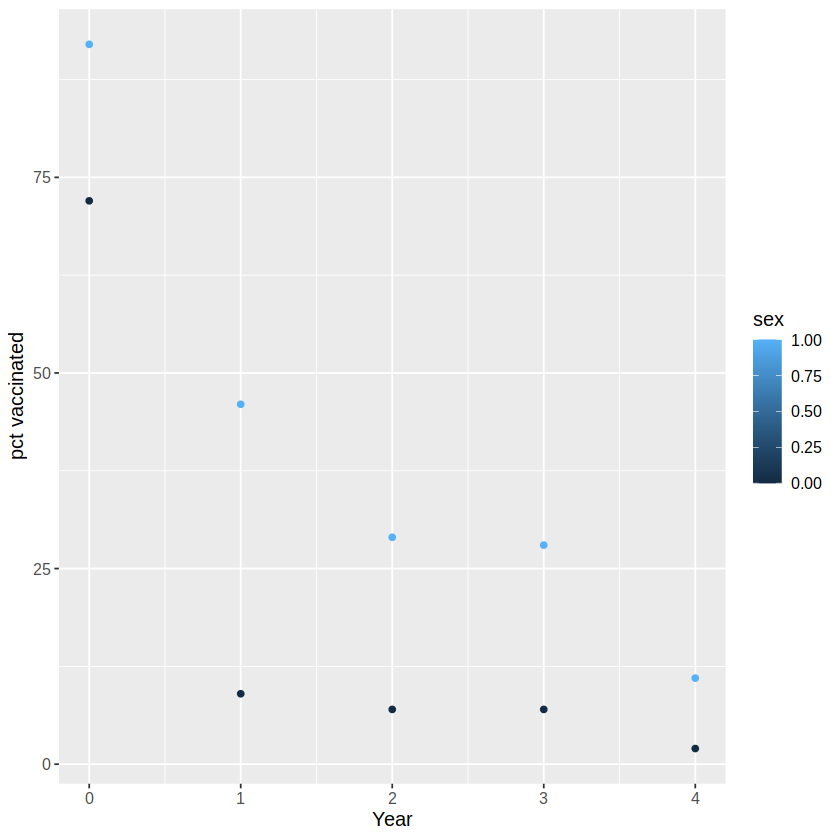

In [29]:
c_plot<- ggplot(b_plot, aes(x = num, y = count)) +
  geom_point(aes(colour =sex)) +
  xlab("Year") +
  ylab("pct vaccinated") +
  theme(text = element_text(size = 12))
c_plot